# Case Study A-Z: A Machine Learning powered Strategy (DNN)

_Disclaimer: <br>
The following illustrative example is for general information and educational purposes only. <br>
It is neither investment advice nor a recommendation to trade, invest or take whatsoever actions.<br>
The below code should only be used in combination with an Oanda/FXCM Practice/Demo Account and NOT with a Live Trading Account._

## Getting and Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Preprocessing data
from talib import abstract
from sklearn.preprocessing import RobustScaler, MinMaxScaler 
import math # Mathematical functions 


/tmp/ipykernel_82647/632752131.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv("DNN_data.csv", parse_dates = ["time"], index_col = "time")

In [3]:
data 

,EUR_USD
time,
2017-01-02 23:20:00,1.04574
2017-01-02 23:40:00,1.04608
2017-01-03 00:00:00,1.04575
2017-01-03 00:20:00,1.04672
2017-01-03 00:40:00,1.04696
...,...
2019-12-30 23:00:00,1.12012
2019-12-30 23:20:00,1.12030
2019-12-30 23:40:00,1.12018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55785 entries, 2017-01-02 23:20:00 to 2019-12-31 00:20:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  55785 non-null  float64
dtypes: float64(1)
memory usage: 871.6 KB


In [5]:
symbol = data.columns[0]
symbol

'EUR_USD'

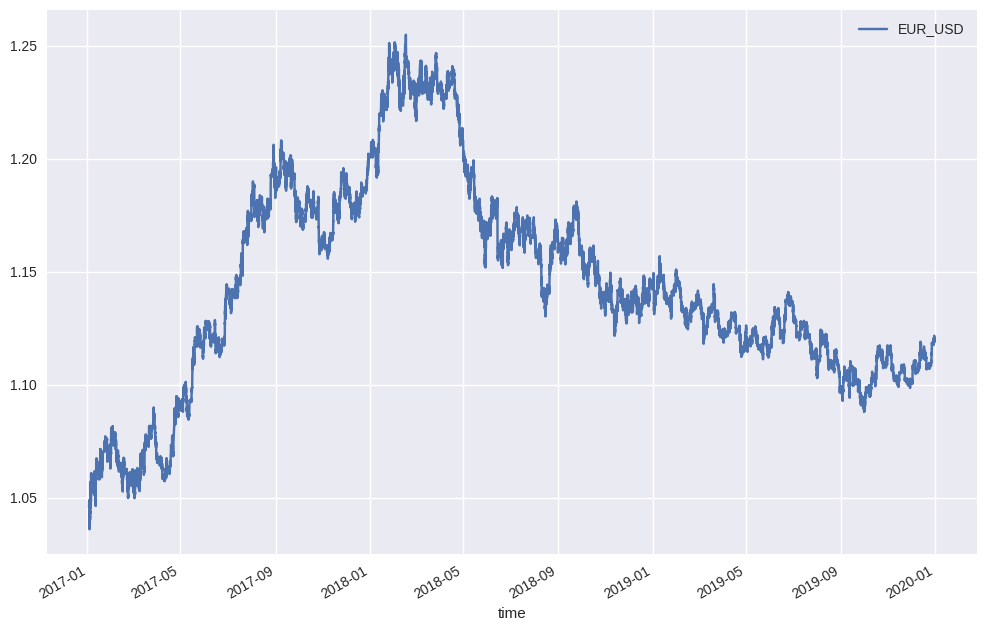

In [6]:
data.plot(figsize = (12, 8))
plt.show()

In [7]:
#data["returns"] = data[symbol] / data[symbol].shift()
data["returns"] = np.log(data[symbol] / data[symbol].shift())

In [8]:
data

,EUR_USD,returns
time,,
2017-01-02 23:20:00,1.04574,NaN
2017-01-02 23:40:00,1.04608,0.00033
2017-01-03 00:00:00,1.04575,-0.00032
2017-01-03 00:20:00,1.04672,0.00093
2017-01-03 00:40:00,1.04696,0.00023
...,...,...
2019-12-30 23:00:00,1.12012,0.00008
2019-12-30 23:20:00,1.12030,0.00016
2019-12-30 23:40:00,1.12018,-0.00011


## Adding Label/Features

In [9]:
window = 50

In [10]:
df = data.copy()
df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window).std()
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)

In [11]:
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-05 01:00:00,1.05406,0.00173,1,0.00275,2.77761,-0.01095,0.00000,0.00138,0.00080
2017-01-05 01:20:00,1.05226,-0.00171,0,0.00290,2.00028,-0.00905,0.00171,-0.00010,0.00084
2017-01-05 01:40:00,1.05138,-0.00084,0,0.00302,1.60440,-0.00822,0.00255,-0.00027,0.00085
2017-01-05 02:00:00,1.05196,0.00055,1,0.00314,1.71886,-0.00876,0.00200,-0.00066,0.00085
2017-01-05 02:20:00,1.05230,0.00032,1,0.00327,1.74272,-0.00908,0.00167,0.00001,0.00085
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039


## Adding Features

In [12]:
lags = 5

In [13]:
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [14]:

for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    df[col] = df["returns"].shift(lag)
    cols.append(col)
          
df['Ask_Dir'] = np.where(df['returns'].shift(-1) > df.returns, 1, 0)
cols.append('Ask_Dir')

df['SMA'] = abstract.SMA(df['returns'], timeperiod=12)
cols.append('SMA')
df['SMA_Dir'] = np.where(df['SMA'].shift(-1) > df.SMA, 1, 0)
cols.append('SMA_Dir')

df['RSI'] = abstract.RSI(df['returns'], timeperiod=12)
cols.append('RSI')
df['RSI_Dir'] = np.where(df['RSI'].shift(-1) > df.RSI, 1, 0)
cols.append('RSI_Dir')

df['fastk'], df['fastd'] = abstract.STOCHRSI(df["returns"], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
cols.append('fastk')
cols.append('fastd')
df['fastk_Dir'] = np.where(df['fastk'].shift(-1) > df.fastk, 1, 0)
cols.append('fastk_Dir')
df['fastd_Dir'] = np.where(df['fastd'].shift(-1) > df.fastd, 1, 0)    
cols.append('fastd_Dir')            
   
            
df.dropna(inplace = True)

In [15]:
df.columns

Index(['EUR_USD', 'returns', 'dir', 'sma', 'boll', 'min', 'max', 'mom', 'vol',
       'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'Ask_Dir', 'SMA', 'SMA_Dir',
       'RSI', 'RSI_Dir', 'fastk', 'fastd', 'fastk_Dir', 'fastd_Dir'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55616 entries, 2017-01-05 07:40:00 to 2019-12-31 00:20:00
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUR_USD    55616 non-null  float64
 1   returns    55616 non-null  float64
 2   dir        55616 non-null  int64  
 3   sma        55616 non-null  float64
 4   boll       55616 non-null  float64
 5   min        55616 non-null  float64
 6   max        55616 non-null  float64
 7   mom        55616 non-null  float64
 8   vol        55616 non-null  float64
 9   lag1       55616 non-null  float64
 10  lag2       55616 non-null  float64
 11  lag3       55616 non-null  float64
 12  lag4       55616 non-null  float64
 13  lag5       55616 non-null  float64
 14  Ask_Dir    55616 non-null  int64  
 15  SMA        55616 non-null  float64
 16  SMA_Dir    55616 non-null  int64  
 17  RSI        55616 non-null  float64
 18  RSI_Dir    55616 non-null  int64  
 19  fastk      

In [17]:
len(cols)

14

## Splitting into Train and Test Set

In [18]:
len(df)

55616

In [19]:
split = int(len(df)*0.66)
split

36706

In [20]:
train = df.iloc[:split].copy()
train

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,lag1,...,lag5,Ask_Dir,SMA,SMA_Dir,RSI,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 07:40:00,1.05551,0.00039,1,0.00581,1.64942,-0.00952,0.00166,-0.00055,0.00094,-0.00150,...,-0.00113,1,0.00028,1,48.04671,1,71.66785,37.08146,1,1
2017-01-05 08:00:00,1.05596,0.00043,1,0.00594,1.70630,-0.00994,0.00123,-0.00023,0.00094,0.00039,...,0.00160,0,0.00031,0,48.18995,0,80.95128,53.08215,0,1
2017-01-05 08:20:00,1.05516,-0.00076,0,0.00606,1.39271,-0.00919,0.00199,0.00002,0.00095,0.00043,...,0.00133,0,0.00026,0,44.03324,0,45.99034,66.20316,0,0
2017-01-05 08:40:00,1.05174,-0.00325,0,0.00613,0.29098,-0.00597,0.00525,-0.00119,0.00106,-0.00076,...,-0.00055,1,-0.00004,0,36.76305,1,0.00000,42.31387,1,1
2017-01-05 09:00:00,1.05153,-0.00020,0,0.00617,0.20605,-0.00577,0.00545,-0.00140,0.00105,-0.00325,...,-0.00150,0,-0.00009,0,48.18842,0,99.21739,48.40258,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24 01:20:00,1.13780,-0.00004,0,-0.00290,-0.61860,-0.00168,0.00582,0.00007,0.00076,0.00013,...,0.00006,0,0.00013,0,49.53093,0,0.00000,17.87936,0,0
2018-12-24 01:40:00,1.13770,-0.00009,0,-0.00303,-0.62974,-0.00159,0.00466,0.00000,0.00073,-0.00004,...,0.00005,1,0.00012,0,49.02814,1,0.00000,9.69133,1,1
2018-12-24 02:00:00,1.13806,0.00032,1,-0.00313,-0.45011,-0.00191,0.00418,0.00006,0.00072,-0.00009,...,0.00027,0,0.00006,1,53.01649,0,100.00000,33.33333,0,0


In [21]:
test = df.iloc[split:].copy()
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,lag1,...,lag5,Ask_Dir,SMA,SMA_Dir,RSI,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir
time,,,,,,,,,,,,,,,,,,,,,
2018-12-24 03:00:00,1.13877,0.00011,1,-0.00336,-0.05145,-0.00253,0.00329,0.00021,0.00071,0.00065,...,-0.00004,1,0.00014,1,50.31616,1,26.00742,42.00247,1,1
2018-12-24 03:20:00,1.13912,0.00031,1,-0.00343,0.13802,-0.00284,0.00298,0.00035,0.00070,0.00011,...,-0.00009,0,0.00015,0,52.19080,0,51.98516,59.33086,0,0
2018-12-24 03:40:00,1.13886,-0.00023,0,-0.00350,0.04761,-0.00261,0.00321,0.00006,0.00070,0.00031,...,0.00032,1,0.00012,1,47.05361,1,0.00000,25.99753,1,1
2018-12-24 04:00:00,1.13897,0.00010,1,-0.00358,0.13846,-0.00270,0.00304,0.00006,0.00070,-0.00023,...,-0.00013,0,0.00013,0,50.29121,0,37.37093,29.78536,1,0
2018-12-24 04:20:00,1.13894,-0.00003,0,-0.00365,0.16218,-0.00268,0.00306,-0.00005,0.00070,0.00010,...,0.00065,1,0.00010,0,49.05303,1,38.41970,25.26354,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041,-0.00033,...,0.00029,1,-0.00001,1,50.90174,1,53.44446,51.14815,1,0
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040,0.00008,...,0.00007,0,-0.00001,1,51.68920,0,63.82901,39.09116,0,1
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039,0.00016,...,-0.00030,1,0.00001,0,48.84045,1,26.72987,48.00111,1,1


In [22]:
train

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,lag1,...,lag5,Ask_Dir,SMA,SMA_Dir,RSI,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 07:40:00,1.05551,0.00039,1,0.00581,1.64942,-0.00952,0.00166,-0.00055,0.00094,-0.00150,...,-0.00113,1,0.00028,1,48.04671,1,71.66785,37.08146,1,1
2017-01-05 08:00:00,1.05596,0.00043,1,0.00594,1.70630,-0.00994,0.00123,-0.00023,0.00094,0.00039,...,0.00160,0,0.00031,0,48.18995,0,80.95128,53.08215,0,1
2017-01-05 08:20:00,1.05516,-0.00076,0,0.00606,1.39271,-0.00919,0.00199,0.00002,0.00095,0.00043,...,0.00133,0,0.00026,0,44.03324,0,45.99034,66.20316,0,0
2017-01-05 08:40:00,1.05174,-0.00325,0,0.00613,0.29098,-0.00597,0.00525,-0.00119,0.00106,-0.00076,...,-0.00055,1,-0.00004,0,36.76305,1,0.00000,42.31387,1,1
2017-01-05 09:00:00,1.05153,-0.00020,0,0.00617,0.20605,-0.00577,0.00545,-0.00140,0.00105,-0.00325,...,-0.00150,0,-0.00009,0,48.18842,0,99.21739,48.40258,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24 01:20:00,1.13780,-0.00004,0,-0.00290,-0.61860,-0.00168,0.00582,0.00007,0.00076,0.00013,...,0.00006,0,0.00013,0,49.53093,0,0.00000,17.87936,0,0
2018-12-24 01:40:00,1.13770,-0.00009,0,-0.00303,-0.62974,-0.00159,0.00466,0.00000,0.00073,-0.00004,...,0.00005,1,0.00012,0,49.02814,1,0.00000,9.69133,1,1
2018-12-24 02:00:00,1.13806,0.00032,1,-0.00313,-0.45011,-0.00191,0.00418,0.00006,0.00072,-0.00009,...,0.00027,0,0.00006,1,53.01649,0,100.00000,33.33333,0,0


## Feature Scaling (Standardization)

In [23]:
train[cols]

,lag1,lag2,lag3,lag4,lag5,Ask_Dir,SMA,SMA_Dir,RSI,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir
time,,,,,,,,,,,,,,
2017-01-05 07:40:00,-0.00150,-0.00055,0.00133,0.00160,-0.00113,1,0.00028,1,48.04671,1,71.66785,37.08146,1,1
2017-01-05 08:00:00,0.00039,-0.00150,-0.00055,0.00133,0.00160,0,0.00031,0,48.18995,0,80.95128,53.08215,0,1
2017-01-05 08:20:00,0.00043,0.00039,-0.00150,-0.00055,0.00133,0,0.00026,0,44.03324,0,45.99034,66.20316,0,0
2017-01-05 08:40:00,-0.00076,0.00043,0.00039,-0.00150,-0.00055,1,-0.00004,0,36.76305,1,0.00000,42.31387,1,1
2017-01-05 09:00:00,-0.00325,-0.00076,0.00043,0.00039,-0.00150,0,-0.00009,0,48.18842,0,99.21739,48.40258,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24 01:20:00,0.00013,0.00012,0.00027,0.00005,0.00006,0,0.00013,0,49.53093,0,0.00000,17.87936,0,0
2018-12-24 01:40:00,-0.00004,0.00013,0.00012,0.00027,0.00005,1,0.00012,0,49.02814,1,0.00000,9.69133,1,1
2018-12-24 02:00:00,-0.00009,-0.00004,0.00013,0.00012,0.00027,0,0.00006,1,53.01649,0,100.00000,33.33333,0,0


In [24]:
mu, std = train.mean(), train.std() # train set parameters (mu, std) for standardization

In [25]:
std

EUR_USD      0.05117
returns      0.00054
dir          0.49996
sma          0.00287
boll         1.44126
min          0.00236
max          0.00225
mom          0.00031
vol          0.00018
lag1         0.00054
lag2         0.00054
lag3         0.00054
lag4         0.00054
lag5         0.00054
Ask_Dir      0.49997
SMA          0.00015
SMA_Dir      0.50000
RSI          4.02394
RSI_Dir      0.49997
fastk       38.02815
fastd       21.31212
fastk_Dir    0.49878
fastd_Dir    0.49935
dtype: float64

In [26]:
train_s = (train - mu) / std # standardization of train set features

In [27]:
train_s.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,lag1,...,lag5,Ask_Dir,SMA,SMA_Dir,RSI,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir
count,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,...,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000,36706.00000
mean,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,...,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-2.14649,-15.50622,-0.98624,-4.52941,-4.35648,-7.24981,-1.07200,-11.84885,-2.02111,-15.50480,...,-15.50071,-0.98748,-8.65189,-0.99683,-7.96394,-0.98753,-1.31028,-2.33793,-0.93231,-0.95002
25%,-0.50300,-0.45366,-0.98624,-0.67730,-0.73946,-0.48634,-0.75341,-0.46063,-0.67024,-0.45352,...,-0.45357,-0.98748,-0.49276,-0.99683,-0.55936,-0.98753,-1.04571,-0.72234,-0.93231,-0.95002
50%,0.16911,-0.00384,-0.98624,-0.02442,0.01599,0.28219,-0.27234,-0.00661,-0.18055,-0.00373,...,-0.00379,-0.98748,0.00047,-0.99683,-0.00441,-0.98753,-0.00720,0.00162,-0.93231,-0.95002
75%,0.58260,0.45648,1.01392,0.65769,0.74350,0.74456,0.50069,0.45729,0.43984,0.45640,...,0.45637,1.01265,0.48964,1.00315,0.55960,1.01260,1.04674,0.72415,1.07257,1.05258
max,1.92898,28.50089,1.01392,3.40233,4.37637,1.07146,9.18852,18.75491,10.36163,28.49858,...,28.49089,1.01265,10.05993,1.00315,8.71955,1.01260,1.31935,2.35424,1.07257,1.05258


In [28]:
df.describe

<bound method NDFrame.describe of                      EUR_USD  returns  dir     sma    boll      min     max  \
time                                                                          
2017-01-05 07:40:00  1.05551  0.00039    1 0.00581 1.64942 -0.00952 0.00166   
2017-01-05 08:00:00  1.05596  0.00043    1 0.00594 1.70630 -0.00994 0.00123   
2017-01-05 08:20:00  1.05516 -0.00076    0 0.00606 1.39271 -0.00919 0.00199   
2017-01-05 08:40:00  1.05174 -0.00325    0 0.00613 0.29098 -0.00597 0.00525   
2017-01-05 09:00:00  1.05153 -0.00020    0 0.00617 0.20605 -0.00577 0.00545   
...                      ...      ...  ...     ...     ...      ...     ...   
2019-12-30 23:00:00  1.12012  0.00008    1 0.00316 0.11606 -0.00136 0.00145   
2019-12-30 23:20:00  1.12030  0.00016    1 0.00312 0.33557 -0.00152 0.00129   
2019-12-30 23:40:00  1.12018 -0.00011    0 0.00306 0.15542 -0.00141 0.00139   
2019-12-31 00:00:00  1.12013 -0.00004    0 0.00299 0.09029 -0.00137 0.00144   
2019-12-31 00:20:0

## Creating and Fitting the DNN Model

In [29]:
from DNNModel import *

2023-05-08 21:39:51.939882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 21:39:51.994433: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 21:39:51.994987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 21:39:53.072284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/mik/anaconda3/envs/tensor/lib/python3.8/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
# fitting a DNN model with 3 Hidden Layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

In [31]:
model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set

1148/1148 [==============================] - 2s 2ms/step - loss: 0.0825 - accuracy: 0.9660


[0.0824643149971962, 0.9660000801086426]

In [32]:
pred = model.predict(train_s[cols]) # prediction (probabilities)
pred

1148/1148 [==============================] - 2s 1ms/step


array([[1.2374418e-01],
       [1.5237738e-01],
       [4.2413704e-09],
       ...,
       [9.9999857e-01],
       [5.9478375e-04],
       [1.0000000e+00]], dtype=float32)

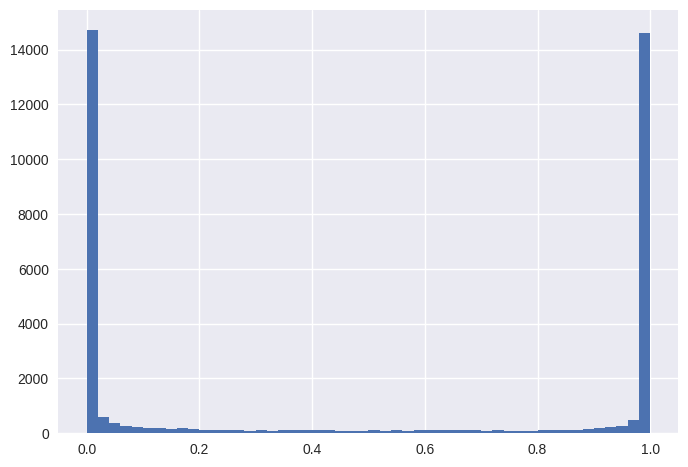

In [33]:
plt.hist(pred, bins = 50)
plt.show()

## Out-Sample Prediction and Forward Testing

In [34]:
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,lag1,...,lag5,Ask_Dir,SMA,SMA_Dir,RSI,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir
time,,,,,,,,,,,,,,,,,,,,,
2018-12-24 03:00:00,1.13877,0.00011,1,-0.00336,-0.05145,-0.00253,0.00329,0.00021,0.00071,0.00065,...,-0.00004,1,0.00014,1,50.31616,1,26.00742,42.00247,1,1
2018-12-24 03:20:00,1.13912,0.00031,1,-0.00343,0.13802,-0.00284,0.00298,0.00035,0.00070,0.00011,...,-0.00009,0,0.00015,0,52.19080,0,51.98516,59.33086,0,0
2018-12-24 03:40:00,1.13886,-0.00023,0,-0.00350,0.04761,-0.00261,0.00321,0.00006,0.00070,0.00031,...,0.00032,1,0.00012,1,47.05361,1,0.00000,25.99753,1,1
2018-12-24 04:00:00,1.13897,0.00010,1,-0.00358,0.13846,-0.00270,0.00304,0.00006,0.00070,-0.00023,...,-0.00013,0,0.00013,0,50.29121,0,37.37093,29.78536,1,0
2018-12-24 04:20:00,1.13894,-0.00003,0,-0.00365,0.16218,-0.00268,0.00306,-0.00005,0.00070,0.00010,...,0.00065,1,0.00010,0,49.05303,1,38.41970,25.26354,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041,-0.00033,...,0.00029,1,-0.00001,1,50.90174,1,53.44446,51.14815,1,0
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040,0.00008,...,0.00007,0,-0.00001,1,51.68920,0,63.82901,39.09116,0,1
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039,0.00016,...,-0.00030,1,0.00001,0,48.84045,1,26.72987,48.00111,1,1


In [35]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)

In [36]:
model.evaluate(test_s[cols], test["dir"])

591/591 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9604


[0.09205373376607895, 0.9604442119598389]

In [37]:
pred = model.predict(test_s[cols])
pred

591/591 [==============================] - 1s 2ms/step


array([[9.9116158e-01],
       [9.9999684e-01],
       [1.6131457e-05],
       ...,
       [7.7433581e-04],
       [7.0873454e-02],
       [9.9992180e-01]], dtype=float32)

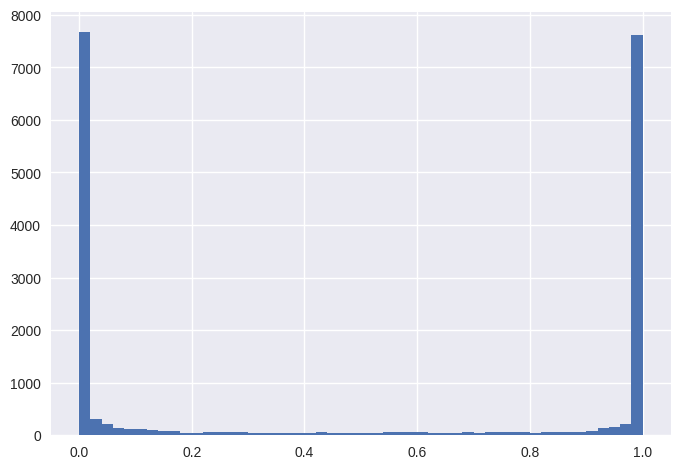

In [38]:
plt.hist(pred, bins = 50);

In [39]:
test["proba"] = model.predict(test_s[cols])

591/591 [==============================] - 1s 1ms/step


In [40]:
test["position"] = np.where(test.proba < 0.47, -1, np.nan) # 1. short where proba < 0.47

In [41]:
test["position"] = np.where(test.proba > 0.53, 1, test.position) # 2. long where proba > 0.53

In [42]:
test["position"].min()


-1.0

In [43]:
test["position"]

time
2018-12-24 03:00:00    1.00000
2018-12-24 03:20:00    1.00000
2018-12-24 03:40:00   -1.00000
2018-12-24 04:00:00    1.00000
2018-12-24 04:20:00   -1.00000
                        ...   
2019-12-30 23:00:00    1.00000
2019-12-30 23:20:00    1.00000
2019-12-30 23:40:00   -1.00000
2019-12-31 00:00:00   -1.00000
2019-12-31 00:20:00    1.00000
Name: position, Length: 18910, dtype: float64

In [44]:
test.index = test.index.tz_localize("UTC")
test["NYTime"] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour

In [45]:
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position) # 3. neutral in non-busy hours

In [46]:
test["position"] = test.position.ffill().fillna(0) # 4. in all other cases: hold position

In [47]:
test.position.value_counts(dropna = False)

0.00000     10232
-1.00000     4410
1.00000      4268
Name: position, dtype: int64

In [48]:
test["strategy"] = test["position"] * test["returns"]

In [49]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

In [50]:
test["creturns"].describe()

count   18910.00000
mean        0.98359
std         0.01206
min         0.95557
25%         0.97369
50%         0.98374
75%         0.99270
max         1.01606
Name: creturns, dtype: float64

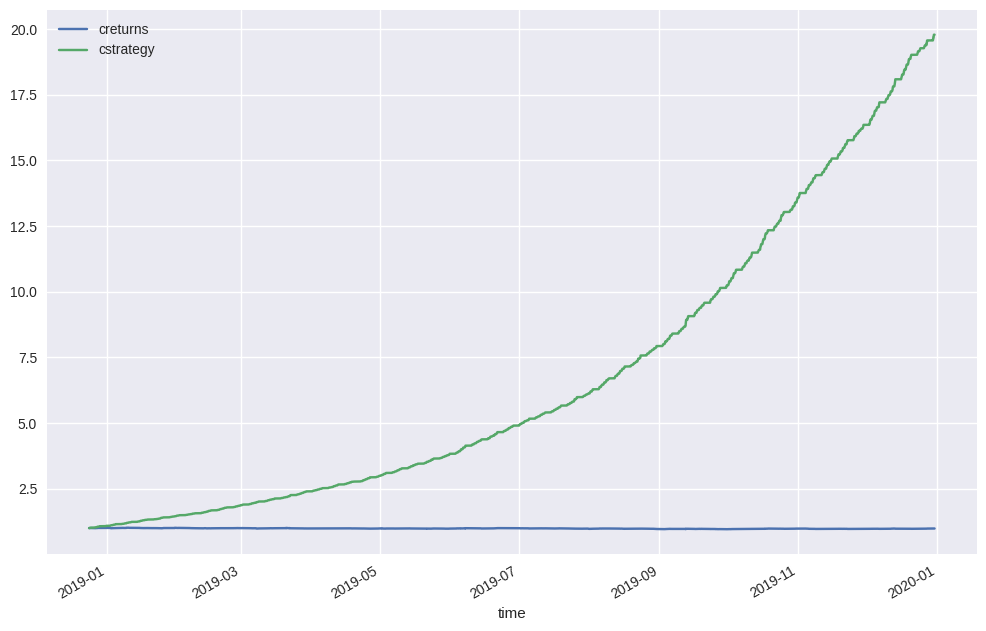

In [51]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [52]:
ptc = 0.000059

In [53]:
test["trades"] = test.position.diff().abs()

In [54]:
test.trades.value_counts()

0.00000    14007
2.00000     4376
1.00000      526
Name: trades, dtype: int64

In [55]:
test["strategy_net"] = test.strategy - test.trades * ptc

In [56]:
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

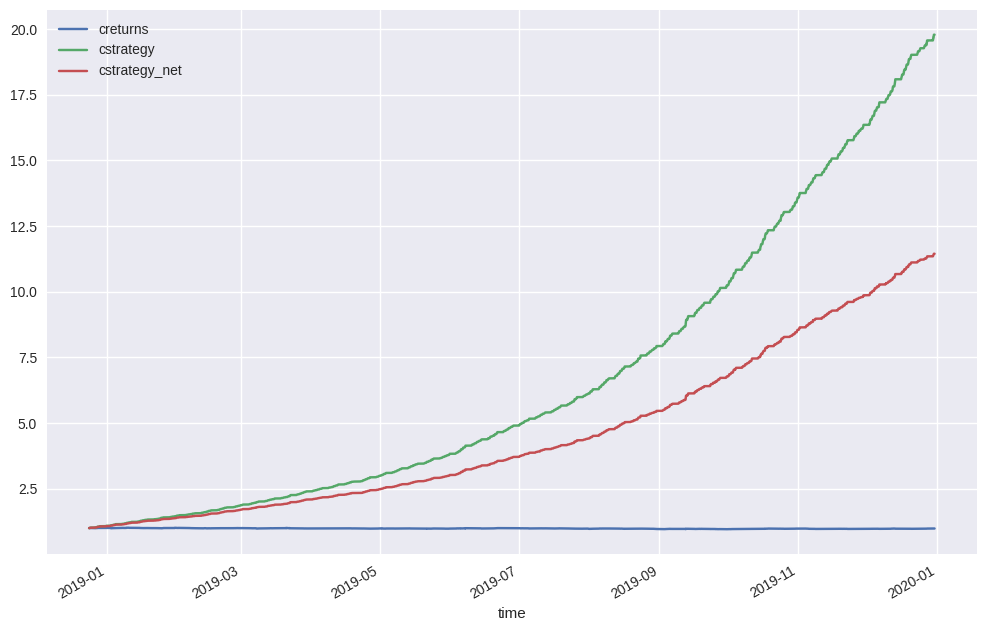

In [57]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

## Saving Model and Parameters

In [58]:
model

In [59]:
mu

EUR_USD      1.15623
returns      0.00000
dir          0.49308
sma          0.00014
boll         0.01388
min         -0.00253
max          0.00241
mom          0.00000
vol          0.00051
lag1         0.00000
lag2         0.00000
lag3         0.00000
lag4         0.00000
lag5         0.00000
Ask_Dir      0.49371
SMA          0.00000
SMA_Dir      0.49842
RSI         49.99375
RSI_Dir      0.49373
fastk       49.82765
fastd       49.82625
fastk_Dir    0.46502
fastd_Dir    0.47439
dtype: float64

In [60]:
std

EUR_USD      0.05117
returns      0.00054
dir          0.49996
sma          0.00287
boll         1.44126
min          0.00236
max          0.00225
mom          0.00031
vol          0.00018
lag1         0.00054
lag2         0.00054
lag3         0.00054
lag4         0.00054
lag5         0.00054
Ask_Dir      0.49997
SMA          0.00015
SMA_Dir      0.50000
RSI          4.02394
RSI_Dir      0.49997
fastk       38.02815
fastd       21.31212
fastk_Dir    0.49878
fastd_Dir    0.49935
dtype: float64

In [61]:
model.save("DNN_model")

2023-05-08 21:42:16.234356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50]
	 [[{{node inputs}}]]
2023-05-08 21:42:16.255337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50]
	 [[{{node inputs}}]]
2023-05-08 21:42:16.275034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50]
	 [[{{node inputs}}]]
2023-05-08 21:42:16

INFO:tensorflow:Assets written to: DNN_model/assets


In [62]:
import pickle

In [63]:
params = {"mu":mu, "std":std}

In [64]:
params

{'mu': EUR_USD      1.15623
 returns      0.00000
 dir          0.49308
 sma          0.00014
 boll         0.01388
 min         -0.00253
 max          0.00241
 mom          0.00000
 vol          0.00051
 lag1         0.00000
 lag2         0.00000
 lag3         0.00000
 lag4         0.00000
 lag5         0.00000
 Ask_Dir      0.49371
 SMA          0.00000
 SMA_Dir      0.49842
 RSI         49.99375
 RSI_Dir      0.49373
 fastk       49.82765
 fastd       49.82625
 fastk_Dir    0.46502
 fastd_Dir    0.47439
 dtype: float64,
 'std': EUR_USD      0.05117
 returns      0.00054
 dir          0.49996
 sma          0.00287
 boll         1.44126
 min          0.00236
 max          0.00225
 mom          0.00031
 vol          0.00018
 lag1         0.00054
 lag2         0.00054
 lag3         0.00054
 lag4         0.00054
 lag5         0.00054
 Ask_Dir      0.49997
 SMA          0.00015
 SMA_Dir      0.50000
 RSI          4.02394
 RSI_Dir      0.49997
 fastk       38.02815
 fastd       21.31212
 f

In [65]:
pickle.dump(params, open("params.pkl", "wb"))

## Implementation

In [66]:
import pandas as pd
import numpy as np
import tpqoa
import fxcmpy
from datetime import datetime, timedelta
import time

/home/mik/anaconda3/envs/tensor/lib/python3.8/site-packages/v20-3.0.25.0-py3.8.egg/v20/request.py:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/mik/anaconda3/envs/tensor/lib/python3.8/site-packages/v20-3.0.25.0-py3.8.egg/v20/request.py:30: SyntaxWarning: "is" with a literal. Did you mean "=="?


__Loading Model and Parameters__

In [67]:
# Loading the model
import keras
model = keras.models.load_model("DNN_model")

In [68]:
model

In [69]:
# Loading mu and std
import pickle
params = pickle.load(open("params.pkl", "rb"))
mu = params["mu"]
std = params["std"]

In [70]:
mu

EUR_USD      1.15623
returns      0.00000
dir          0.49308
sma          0.00014
boll         0.01388
min         -0.00253
max          0.00241
mom          0.00000
vol          0.00051
lag1         0.00000
lag2         0.00000
lag3         0.00000
lag4         0.00000
lag5         0.00000
Ask_Dir      0.49371
SMA          0.00000
SMA_Dir      0.49842
RSI         49.99375
RSI_Dir      0.49373
fastk       49.82765
fastd       49.82625
fastk_Dir    0.46502
fastd_Dir    0.47439
dtype: float64

In [71]:
std

EUR_USD      0.05117
returns      0.00054
dir          0.49996
sma          0.00287
boll         1.44126
min          0.00236
max          0.00225
mom          0.00031
vol          0.00018
lag1         0.00054
lag2         0.00054
lag3         0.00054
lag4         0.00054
lag5         0.00054
Ask_Dir      0.49997
SMA          0.00015
SMA_Dir      0.50000
RSI          4.02394
RSI_Dir      0.49997
fastk       38.02815
fastd       21.31212
fastk_Dir    0.49878
fastd_Dir    0.49935
dtype: float64

__[FXCM] Implementation__

In [72]:
api = fxcmpy.fxcmpy(config_file= "FXCM.cfg")

In [73]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [74]:
class DNNTrader():
    
    def __init__(self, instrument, bar_length, window, lags, model, mu, std, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()) # NEW -> Start Time of Trading Session
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = df.append(self.tick_data.iloc[-1]) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for lag in range(1, lags + 1):
            col = "lag{}".format(lag)
            df[col] = df["returns"].shift(lag)
            cols.append(col)
                
                
        df['Ask_Dir'] = np.where(df['returns'].shift(-1) > df.returns, 1, 0)
        cols.append('Ask_Dir')

        df['SMA'] = abstract.SMA(df['returns'], timeperiod=12)
        cols.append('SMA')
        df['SMA_Dir'] = np.where(df['SMA'].shift(-1) > df.SMA, 1, 0)
        cols.append('SMA_Dir')

        df['RSI'] = abstract.RSI(df['returns'], timeperiod=12)
        cols.append('RSI')
        df['RSI_Dir'] = np.where(df['RSI'].shift(-1) > df.RSI, 1, 0)
        cols.append('RSI_Dir')

        df['fastk'], df['fastd'] = abstract.STOCHRSI(df["returns"], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
        cols.append('fastk')
        cols.append('fastd')
        df['fastk_Dir'] = np.where(df['fastk'].shift(-1) > df.fastk, 1, 0)
        cols.append('fastk_Dir')
        df['fastd_Dir'] = np.where(df['fastd'].shift(-1) > df.fastd, 1, 0)    
        cols.append('fastd_Dir')                
                
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        print(df.columns )
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")

In [75]:
trader = DNNTrader("EUR/USD", bar_length = "20min", 
                   window = 50, lags = 5, model = model, mu = mu, std = std, units = 100)

In [76]:

trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

In [77]:
'''
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0
'''

'\napi.unsubscribe_market_data(trader.instrument)\nif len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)\n    api.close_all_for_symbol(trader.instrument)\n    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")\n    time.sleep(20)\n    print(api.get_closed_positions_summary()[col])\n    trader.position = 0\n'

In [78]:
#trader.data

In [79]:
#api.close()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 